In [1]:
# iMPORTATION DES BIBLIOTHEQUES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

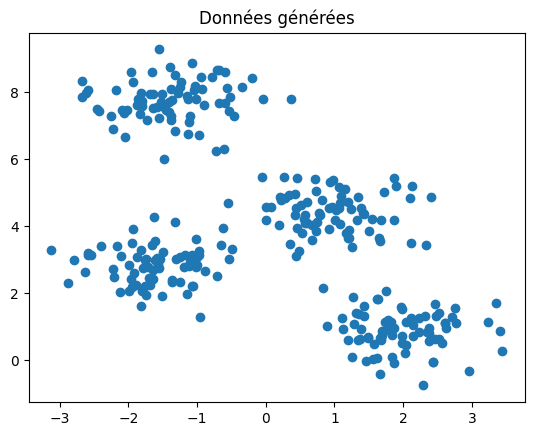

In [2]:
# GENERATION DES DONNEES ALEATOIRES
# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Générer des données aléatoires
data, labels = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df #affichage des données aléatoires
plt.scatter(df['Feature1'], df['Feature2'])
plt.title('Données générées')
plt.show()

In [3]:
# APPLICATION DE L'ALGO DE K-MEANS
# Initialiser K-means avec 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

# Ajouter les labels des clusters au DataFrame
df['Cluster'] = kmeans.labels_
df #Affichage des clusters

,Feature1,Feature2,Cluster
0,0.836857,2.136359,0
1,-1.413658,7.409623,2
2,1.155213,5.099619,1
3,-1.018616,7.814915,2
4,1.271351,1.892542,0
...,...,...,...
295,1.973698,1.579798,0
296,2.518342,1.391766,0
297,0.438990,4.535929,1
298,0.369479,7.791105,2


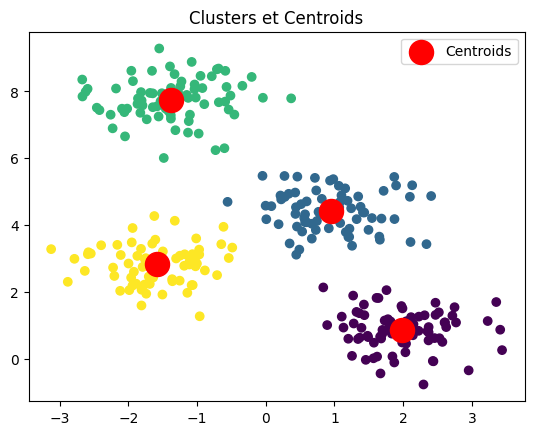

In [4]:
# VISUALISATION DES CLUSTERS
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters et Centroids')
plt.legend()
plt.show()

In [5]:
# INTERPRETATION DES RESULTATS
centroids = kmeans.cluster_centers_
print('Centroids des clusters:')
print(centroids)

Centroids des clusters:
[[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


## L'analyse de clustering KMeans  produit les résultats clés suivants :

1. **Nombre de clusters :**
- Les données ont été regroupées en **quatre clusters**, comme le montre la sortie des centroïdes, qui correspond aux quatre points centraux qui représentent l'emplacement moyen des points de données dans chaque cluster.

2. **Centroïdes de cluster :**
- Les centroïdes des clusters sont les suivants :
- Cluster 1 : \([1,98, 0,87]\)
- Cluster 2 : \([0,95, 4,42]\)
- Cluster 3 : \([-1,37, 7,75]\)
- Cluster 4 : \([-1,58, 2,83]\)

Ces centroïdes représentent le point central de chaque groupe formé dans l'espace des caractéristiques, indiquant les valeurs moyennes des deux caractéristiques de chaque cluster.

3. **Visualisation :**
- Un **diagramme de dispersion** montre la distribution des points de données sur les deux entités, codés par couleur en fonction de leur groupe. Les points rouges représentent les centroïdes de chaque groupe, montrant visuellement dans quelle mesure les centroïdes résument bien les points de données de chaque groupe.

### Interprétation :
- Chaque groupe regroupe les points de données qui sont plus similaires les uns aux autres en fonction de leurs valeurs de caractéristiques. Les centroïdes fournissent un résumé du point de données typique pour chaque groupe.
- Le clustering peut aider à identifier des modèles ou des segments distincts au sein de l'ensemble de données. Par exemple, la séparation visuelle entre les groupes indique dans quelle mesure l'algorithme KMeans a partitionné les données. Cela peut être utile pour la segmentation, que ce soit pour l'analyse des clients, la détection d'anomalies ou la reconnaissance de modèles.